In [65]:
import numpy as np
import pandas as pd

%matplotlib inline

In [66]:
#Testing potential models

Single feature LSTM model using AirBNB SEC financial data plus closing prices

In [67]:
abnb_sent_df = pd.read_csv('/Users/krist/OneDrive/Desktop/P2G2-ProjectGit/Notebooks/models/resources/ABNB_WITH_SEC.csv', index_col=0)
abnb_sent_df.tail()

,RevenueFromContractWithCustomerExcludingAssessedTax,CostOfRevenue,operations_and_support_expense,research_and_development_expense,selling_and_market_expense,general_and_administrative_expense,RestructuringCharges,costs_and_expenses,operating_income_loss,InvestmentIncomeNonoperating,...,sec_compound_sentiment,sec_positive_sentiment,sec_neutral sentiment,sec_negative_sentiment,stockmarket_compound_sentiment,stockmarket_positive_sentiment,stockmarket_neutral_sentiment,stockmarket_negative_sentiment,volume,close
2022-05-25,1.508937e+09,362623000.0,233012000.0,362927000.0,344616000.0,210573000.0,317000.0,1.514068e+09,-5131000.0,4744000.0,...,0.9999,0.08,0.895,0.025,0.3612,0.161,0.839,0.0,6170197.0,110.40
2022-05-26,1.508937e+09,362623000.0,233012000.0,362927000.0,344616000.0,210573000.0,317000.0,1.514068e+09,-5131000.0,4744000.0,...,0.9999,0.08,0.895,0.025,0.3612,0.161,0.839,0.0,6884206.0,114.30
2022-05-27,1.508937e+09,362623000.0,233012000.0,362927000.0,344616000.0,210573000.0,317000.0,1.514068e+09,-5131000.0,4744000.0,...,0.9999,0.08,0.895,0.025,0.3612,0.161,0.839,0.0,7375113.0,120.50
2022-05-31,1.508937e+09,362623000.0,233012000.0,362927000.0,344616000.0,210573000.0,317000.0,1.514068e+09,-5131000.0,4744000.0,...,0.9999,0.08,0.895,0.025,0.3612,0.161,0.839,0.0,9089352.0,120.87
2022-06-01,1.508937e+09,362623000.0,233012000.0,362927000.0,344616000.0,210573000.0,317000.0,1.514068e+09,-5131000.0,4744000.0,...,0.9999,0.08,0.895,0.025,0.3612,0.161,0.839,0.0,6864663.0,116.72


In [68]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [69]:
#Setting the feature col to revenue and target col to closing prices
X, y = window_data(abnb_sent_df, window=30, feature_col_number=0, target_col_number=28)

In [70]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]


In [71]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [72]:
# Reshape the features for the model

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [74]:

model = Sequential()

number_units = 5
dropout_fraction = 0.2

#Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

#Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

#Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

#Output Layer
model.add(Dense(1))

In [75]:
model.compile(optimizer='adam', loss = 'mean_squared_error')


In [76]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 5)             140       
                                                                 
 dropout_9 (Dropout)         (None, 30, 5)             0         
                                                                 
 lstm_10 (LSTM)              (None, 30, 5)             220       
                                                                 
 dropout_10 (Dropout)        (None, 30, 5)             0         
                                                                 
 lstm_11 (LSTM)              (None, 5)                 220       
                                                                 
 dropout_11 (Dropout)        (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [77]:
model.fit(X_train, y_train, epochs=50, shuffle=False, batch_size=32, verbose=1)


Epoch 1/50
11/11 [==============================] - 11s 34ms/step - loss: 0.1868
Epoch 2/50
11/11 [==============================] - 0s 38ms/step - loss: 0.1426
Epoch 3/50
11/11 [==============================] - 0s 41ms/step - loss: 0.1139
Epoch 4/50
11/11 [==============================] - 0s 41ms/step - loss: 0.0948
Epoch 5/50
11/11 [==============================] - 0s 42ms/step - loss: 0.0875
Epoch 6/50
11/11 [==============================] - 1s 47ms/step - loss: 0.0817
Epoch 7/50
11/11 [==============================] - 1s 55ms/step - loss: 0.0844
Epoch 8/50
11/11 [==============================] - 1s 47ms/step - loss: 0.0761
Epoch 9/50
11/11 [==============================] - 1s 53ms/step - loss: 0.0805
Epoch 10/50
11/11 [==============================] - 1s 55ms/step - loss: 0.0685
Epoch 11/50
11/11 [==============================] - 1s 51ms/step - loss: 0.0726
Epoch 12/50
11/11 [==============================] - 1s 56ms/step - loss: 0.0764
Epoch 13/50
11/11 [=================

In [78]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 3s 9ms/step - loss: 0.0440


0.04399706795811653

In [79]:
predict = model.predict(X_test)

5/5 [==============================] - 3s 7ms/step


In [80]:
predicted_prices = scaler.inverse_transform(predict)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [81]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "actual": real_prices.ravel(),
    "predicted": predicted_prices.ravel()
}, index = abnb_sent_df.index[-len(real_prices): ]) 
stocks.head()

,actual,predicted
2022-01-03,166.49,173.400360
2022-01-04,172.68,172.987335
2022-01-05,170.80,172.346710
2022-01-06,162.25,171.510803
2022-01-07,159.75,170.522980


<AxesSubplot:title={'center':'Actual vs. Predicted Prices'}, xlabel='Date', ylabel='ABNB'>

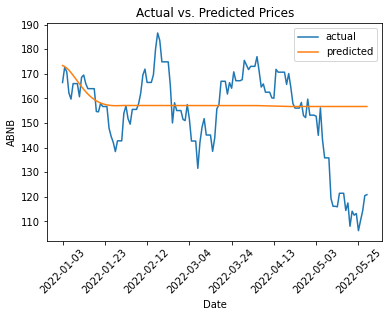

In [82]:
import hvplot.pandas
stocks.plot(xlabel = 'Date', ylabel = 'ABNB', title = 'Actual vs. Predicted Prices', rot=45)


In [83]:
abnb_sent_df[['sec_compound_sentiment', 'close']].corr()

,sec_compound_sentiment,close
sec_compound_sentiment,1.000000,0.290415
close,0.290415,1.000000


In [84]:
abnb_sent_df[['sec_positive_sentiment', 'close']].corr()

,sec_positive_sentiment,close
sec_positive_sentiment,1.000000,0.201152
close,0.201152,1.000000
